In [0]:
import pandas as pd
import numpy as np 
from google.colab import drive
!pip install arrow as arrow
import arrow as arrow
import statsmodels.api as sm

drive.mount('/content/drive')

     |████████████████████████████████| 51kB 1.7MB/s 


In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
travelpony = pd.read_csv(csvfile)
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


Remove 0's for amount spent 


In [0]:
travelpony=travelpony[travelpony['Amount Spent (USD)']!=0]

Graph a histogramof Amount Spent using Seaborn 

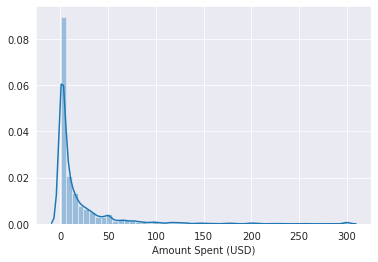

In [0]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(travelpony['Amount Spent (USD)'])

Create a scatter plot for spend and: reach, frequency, impressions and clicks.

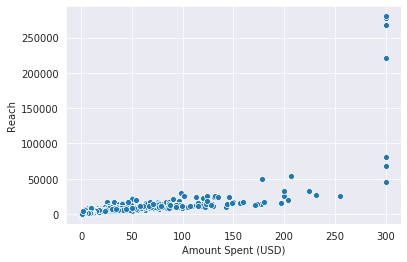

In [0]:
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Reach'])

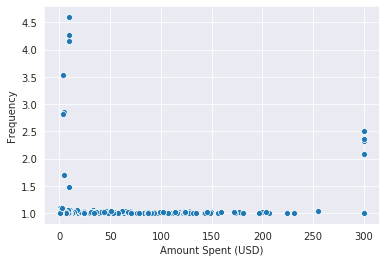

In [0]:
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Frequency'])

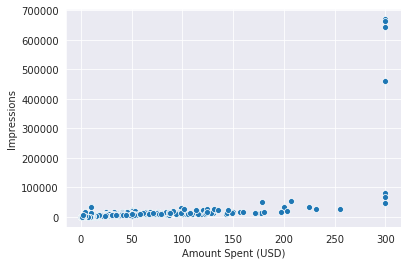

In [0]:
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Impressions'])

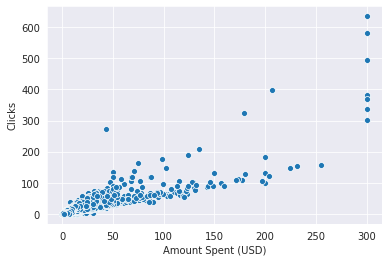

In [0]:
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Clicks'])

Combined scatterplots below, harder to read. 


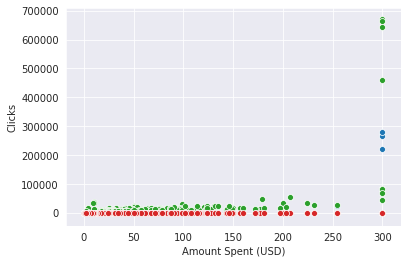

In [0]:
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Reach'])
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Frequency'])
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Impressions'])
sns.scatterplot(travelpony['Amount Spent (USD)'],travelpony['Clicks'])

In [0]:
travelpony['Campaign Name'].unique()

array(['Cyber Weekend', 'TravelPony: General Ads',
       'TravelPony: Conversion Test',
       'Post: You need to get some real sun and we are here to',
       'Nanigans', 'SimpleMultiFillCampaign', 'http:travelponyClicksUS',
       'TravelponyPage LikesUS', 'Ad '], dtype=object)

In [0]:
travelpony['Campaign Name']= travelpony['Campaign Name'].astype('str')
travelpony['Campaign Name']= travelpony['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]','')
travelpony['Campaign Name']= travelpony['Campaign Name'].str.replace('\d+','')

In [0]:
pd.get_dummies(travelpony['Campaign Name'])
travelpony = pd.concat([travelpony,pd.get_dummies(travelpony['Campaign Name'])],axis=1)
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad,Cyber Weekend,Nanigans,Post: You need to get some real sun and we are here to,SimpleMultiFillCampaign,TravelPony: Conversion Test,TravelPony: General Ads,TravelponyPage LikesUS,http:travelponyClicksUS
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,1,0,0


Build a multiple regression with an outcome variable of Amount Spent and predictor variables: Campaign Name, Reach, Frequency, Impressions, Clicks, Unique Clicks, Page Likes, Page Engagement, Post Engagement, Post Likes, Post Comments, Post Shares, Photo Views, Website Clicks

In [0]:
y = travelpony['Amount Spent (USD)']
x = travelpony[['Ad ','Cyber Weekend','Nanigans','Post: You need to get some real sun and we are here to','SimpleMultiFillCampaign','TravelPony: Conversion Test','TravelPony: General Ads','TravelponyPage LikesUS','http:travelponyClicksUS','Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
model = sm.OLS(y,x.astype(float)).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1282.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:08:47   Log-Likelihood:                -6484.6
No. Observations:                1802   AIC:                         1.301e+04
Df Residuals:                    1781   BIC:                         1.313e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Ad                                                        -8.7199      4.648     -1.876      0.061     -17.836       0.396
Cyber Weekend                                           -210.0978     26.172     -8.028      0.000    -261.429    -158.766
Nanigans                                                 -11.1471      3.438     -3.242      0.001     -17.891      -4.403
Post: You need to get some real sun and we are here to   -25.4838      7.772     -3.279      0.001     -40.726     -10.241
SimpleMultiFillCampaign                                   -8.8824      3.374     -2.632      0.009     -15.500      -2.265
TravelPony: Conversion Test                               45.4009      5.816      7.806      0.000      33.993      56.808
TravelPony: General Ads                                  -34.0630      6.690     -5.091      0.000     -47.185     -20.941
TravelponyPage LikesUS                                   -15.2335      5.554     -2.743      0.006     -26.127      -4.340
http:travelponyClicksUS                                  -26.2998     11.525     -2.282      0.023     -48.904      -3.695
Reach                                                      0.0031      0.000     20.623      0.000       0.003       0.003
Frequency                                                  8.0177      3.337      2.403      0.016       1.474      14.562
Impressions                                               -0.0008   8.08e-05     -9.964      0.000      -0.001      -0.001
Clicks                                                    -0.3369      0.110     -3.073      0.002      -0.552      -0.122
Unique Clicks                                              0.5557      0.122      4.569      0.000       0.317       0.794
Page Likes                                                23.2839      8.919      2.611      0.009       5.791      40.777
Page Engagement                                          -20.1012      8.916     -2.255      0.024     -37.588      -2.615
Post Engagement                                           17.1443      7.431      2.307      0.021       2.571      31.718
Post Likes                                                 2.3301      1.491      1.563      0.118      -0.594       5.254
Post Comments                                              3.5094      1.551      2.263      0.024       0.468       6.551
Post Shares                                                4.8389      1.513      3.198      0.001       1.871       7.807
Photo Views                                                3.1375      1.489      2.107      0.035       0.217       6.058
Website Clicks                                             3.3284      1.489      2.235      0.026       0.408       6.249
========

Looking at the coefficents of the predictor variables, TravelPony: Conversion Test, Page Like, and Post Engagement have the highest coefficent, respectively.